# Assignment 1: Practice Lab: Advice for Applying Machine Learning

## 1 Packages

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

## 2 Evaluating a Learning Algorithm (Polynomial Regression)

### 2.1 Spiltting your data set

In [2]:
X,y,x_ideal,y_ideal=gen_data(18,2,0.7)
print("X.shape",X.shape,"y.shape",y.shape)

X.shape (18,) y.shape (18,)


In [3]:
X

array([ 0.  ,  2.88,  5.76,  8.65, 11.53, 14.41, 17.29, 20.18, 23.06,
       25.94, 28.82, 31.71, 34.59, 37.47, 40.35, 43.24, 46.12, 49.  ])

In [4]:
x_ideal

array([ 0.  ,  2.88,  5.76,  8.65, 11.53, 14.41, 17.29, 20.18, 23.06,
       25.94, 28.82, 31.71, 34.59, 37.47, 40.35, 43.24, 46.12, 49.  ])

In [5]:
y

array([   0.  ,    5.55,   34.39,   71.39,  125.52,  183.03,  237.25,
        441.08,  457.14,  563.11,  901.24, 1025.77,  890.33, 1417.39,
       1268.67, 2242.65, 2653.83, 2391.31])

In [6]:
y_ideal

array([   0.  ,    8.31,   33.23,   74.77,  132.93,  207.7 ,  299.09,
        407.09,  531.71,  672.94,  830.8 , 1005.26, 1196.35, 1404.04,
       1628.36, 1869.29, 2126.84, 2401.  ])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

In [8]:
X_train
X_test
y_train
y_test

array([43.24, 11.53,  2.88, 28.82,  0.  , 49.  , 46.12, 25.94, 23.06,
       34.59, 31.71, 14.41])

array([17.29,  8.65, 37.47,  5.76, 40.35, 20.18])

array([2242.65,  125.52,    5.55,  901.24,    0.  , 2391.31, 2653.83,
        563.11,  457.14,  890.33, 1025.77,  183.03])

array([ 237.25,   71.39, 1417.39,   34.39, 1268.67,  441.08])

In [9]:
print("X_train.shape",X_train.shape,"y_train.shape",y_train.shape)

X_train.shape (12,) y_train.shape (12,)


In [10]:
print("X_test.shape",X_test.shape,"y_test.shape",y_test.shape)

X_test.shape (6,) y_test.shape (6,)


Text(0.5, 1.0, 'Training, Test')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

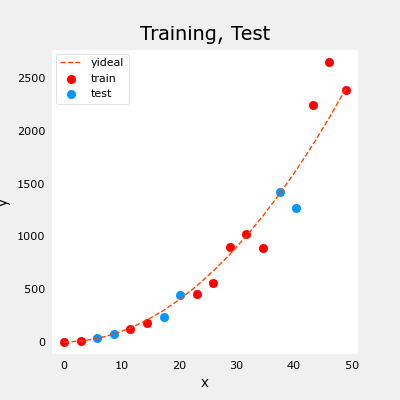

In [11]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal,y_ideal,"--",color="orangered",label="yideal",lw=1)
ax.set_title("Training, Test",fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(X_train,y_train,color="red",label="train")
ax.scatter(X_test,y_test,color=dlc["dlblue"],label="test")
ax.legend(loc="upper left")
plt.show()

### 2.2 Error calculation for model evaluation, linear regression

### <span style="color:red">Exercise 1</span>

In [12]:
def eval_mse(y,yhat):
    """
    Calculate the mean standard error on a data set.
    Args:
        y: (ndarray Shape(m,) or (m,1)) target value of each example
        yhat: (ndarray Shape(m,) or (m,1)) predicted value of each example
    
    Returns:
        err: (scalar)
    """
    m=len(y)
    err=0
    for i in range(m):
        err+=(yhat[i]-y[i])**2
    err=err/(2*m)
    return(err)

In [13]:
y_hat=np.array([2.4,4.2])
y_tmp=np.array([2.3,4.1])
eval_mse(y_hat,y_tmp)

0.0050000000000000305

In [14]:
test_eval_mse(eval_mse)

 All tests passed.


### 2.3 Compare performance on training and test set

In [15]:
degree=10
lmodel=lin_model(degree)
lmodel

In [16]:
lmodel.fit(X_train,y_train)

In [17]:
yhat=lmodel.predict(X_train)
err_train=lmodel.mse(y_train,yhat)

In [18]:
yhat=lmodel.predict(X_test)
err_test=lmodel.mse(y_test,yhat)

In [19]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


In [20]:
x=np.linspace(0,int(X.max()),100)
y_pred=lmodel.predict(x).reshape(-1,1)

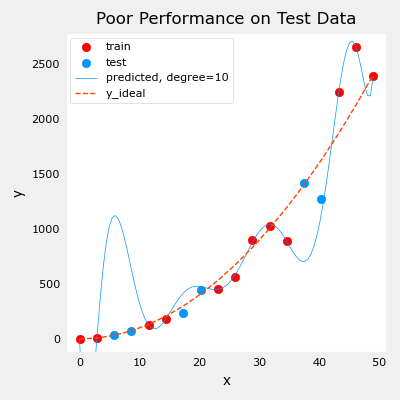

In [21]:
plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [22]:
X,y,x_ideal,y_ideal=gen_data(40,5,0.7)
print("X.shape",X.shape,"y.shape",y.shape)

X_train,X_,y_train,y_=train_test_split(X,y,test_size=0.4,random_state=1)
X_cv,X_test,y_cv,y_test=train_test_split(X_,y_,test_size=0.50,random_state=1)
print("X_train.shape",X_train.shape,"y_train.shape",y_train.shape)
print("X_cv.shape",X_cv.shape,"y_cv.shape",y_cv.shape)
print("X_test.shape",X_test.shape,"y_test.shape",y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


## 3 Bias and Variance

### 3.1 Plot Train, Cross-Validation, Test

Text(0.5, 1.0, 'Training, CV, Test')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

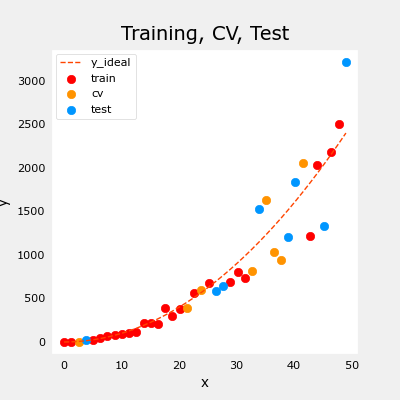

In [23]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal,y_ideal,"--",color="orangered",label="y_ideal",lw=1)
ax.set_title("Training, CV, Test",fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(X_train,y_train,color="red",label="train")
ax.scatter(X_cv,y_cv,color=dlc["dlorange"],label="cv")
ax.scatter(X_test,y_test,color=dlc["dlblue"],label="test")
ax.legend(loc="upper left")
plt.show()

### 3.2 Finding the optimal degree

In [24]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

In [25]:
err_train
err_cv
y_pred


array([33075.06, 10284.87,  8414.67,  5572.78,  4983.98,  4735.37,
        4008.19,  3820.88,  3780.27])

array([ 57076.44,  39591.79,  42671.91,  60706.12,  63952.44,  72688.75,
       115892.5 , 129498.68, 140864.18])

array([[-3.81e+02,  5.35e+01, -7.29e+01,  5.30e+01,  4.41e+00, -2.79e+01,
         2.45e+01, -6.04e-01, -1.12e+01],
       [-3.57e+02,  4.98e+01, -5.98e+01,  3.29e+01,  6.29e+00, -2.78e-02,
        -8.55e+00,  1.85e+00,  1.01e+01],
       [-3.34e+02,  4.67e+01, -4.71e+01,  1.59e+01,  7.78e+00,  2.14e+01,
        -2.88e+01,  3.27e+00,  2.07e+01],
       [-3.11e+02,  4.41e+01, -3.48e+01,  1.84e+00,  9.03e+00,  3.73e+01,
        -3.89e+01,  4.29e+00,  2.43e+01],
       [-2.88e+02,  4.21e+01, -2.28e+01, -9.37e+00,  1.02e+01,  4.86e+01,
        -4.13e+01,  5.36e+00,  2.37e+01],
       [-2.64e+02,  4.06e+01, -1.12e+01, -1.79e+01,  1.13e+01,  5.61e+01,
        -3.78e+01,  6.81e+00,  2.10e+01],
       [-2.41e+02,  3.97e+01,  1.48e-01, -2.39e+01,  1.26e+01,  6.04e+01,
        -3.01e+01,  8.83e+00,  1.78e+01],
       [-2.18e+02,  3.93e+01,  1.12e+01, -2.76e+01,  1.41e+01,  6.24e+01,
        -1.96e+01,  1.15e+01,  1.52e+01],
       [-1.94e+02,  3.95e+01,  2.20e+01, -2.91e+01,  1.60e+01,  6.25e+01

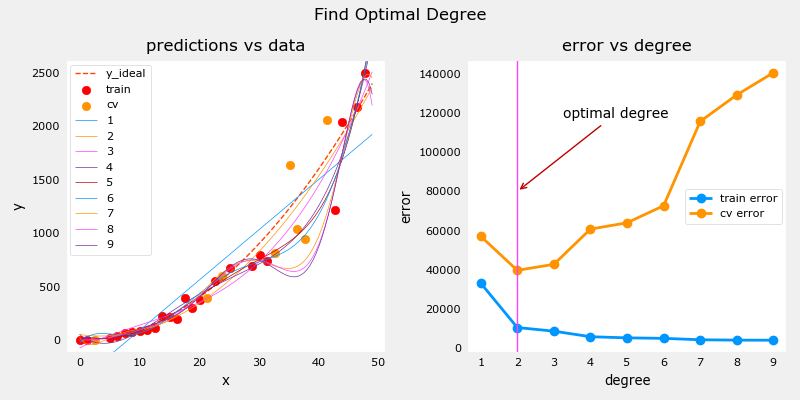

In [26]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

### 3.3 Tuning Regularization

In [27]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

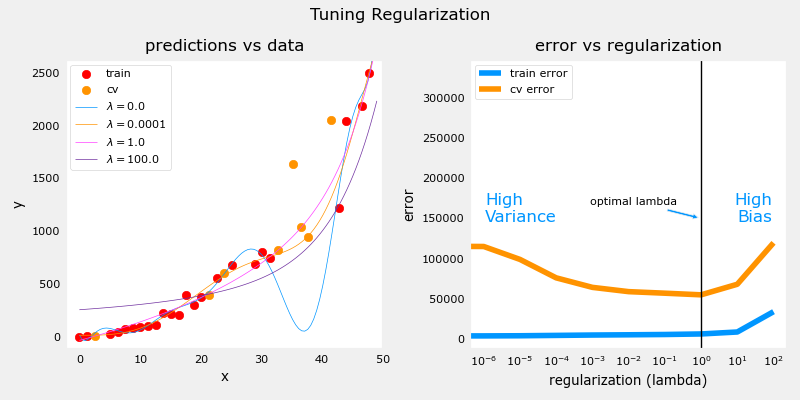

In [28]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

### 3.4 Getting more data: Increasing Training Set Size (m)

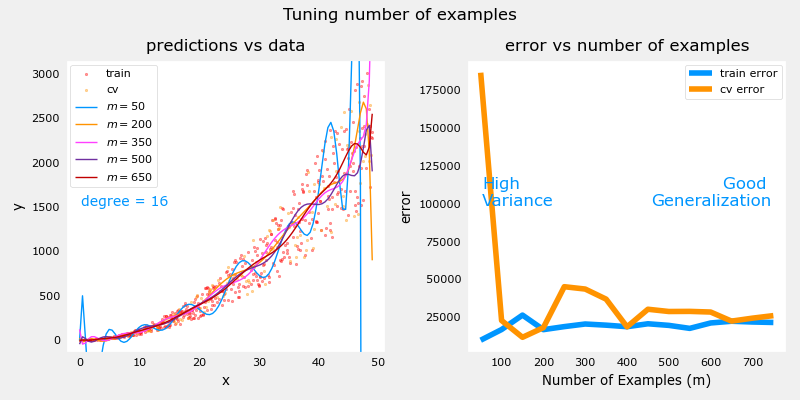

In [30]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

## 4 Evaluating a Learning Algorithm (Neural Network)

### 4.1 Data Set

In [32]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs() 

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


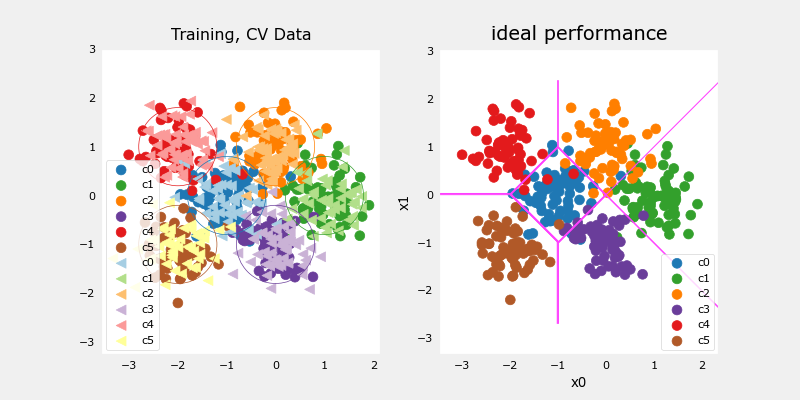

In [33]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

### 4.2 Evaluating categorical model by calculating classification error

### <span style="color:red">Exercise 2</span>

In [34]:
def eval_cat_err(y,yhat):
    """
    Calculate the categorization error
    Args:
        y: (ndarray Shape(m,) or (m,1)) target value of each example
        yhat: (ndarray Shape (m,) or (m,1)) predicted value of each example
    
    Returns:
        cerr: (scalar)
    """
    m=len(y)
    incorrect=0
    for i in range(m):
        if (yhat[i]!=y[i]):
            incorrect+=1
    cerr=incorrect/m
    return(cerr)

In [35]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )


categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


In [36]:
test_eval_cat_err(eval_cat_err)

 All tests passed.


## 5 Model Complexity

### 5.1 Complex Model

### <span style="color:red">Exercise 3</span>

In [37]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)

model=Sequential(
    [
        tf.keras.layers.Dense(120,activation="relu"),
        tf.keras.layers.Dense(40,activation="relu"),
        tf.keras.layers.Dense(6,activation="linear")
    ], name="Complex"
)

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [38]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3467
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4405 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3198 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2660 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2228 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2125 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2076 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2013 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1975 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1955 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1918 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1898 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1869 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1865 
Epoch 15/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [39]:
model.summary()

Model: "Complex"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,340 (127.66 KB)

 Trainable params: 5,446 (42.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,894 (85.11 KB)

In [40]:
#model_test(model,classes,X_train.shape[1])

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step


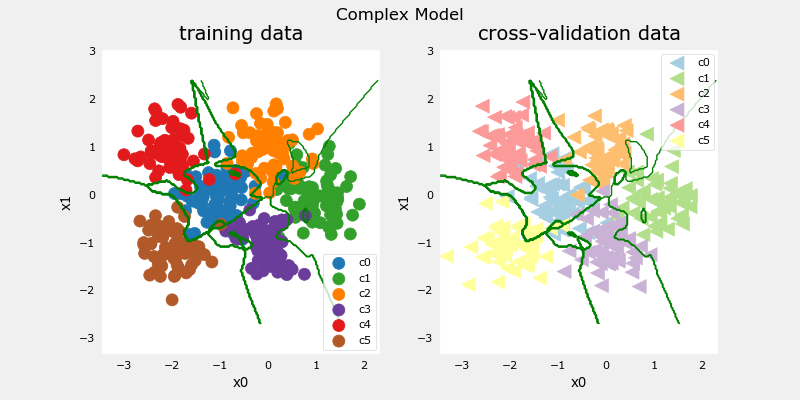

In [41]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [42]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


In [43]:
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

categorization error, training, complex model: 0.003
categorization error, cv,       complex model: 0.122


### 5.1 Simplify the model

### <span style="color:red">Exercise 4</span>

In [44]:
tf.random.set_seed(1234)

model_s=Sequential(
    [
        tf.keras.layers.Dense(6,activation="relu"),
        tf.keras.layers.Dense(6,activation="linear")
    ], name="Complex"
)

model_s.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [45]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9123  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6362 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4576 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2774 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0970 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9501 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8244 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7206 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6362 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5713 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5224 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4838 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4525 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4274 
Epoch 15/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

In [46]:
model_s.summary()

Model: "Complex"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182 (1.42 KB)

 Trainable params: 60 (480.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122 (976.00 B)

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step


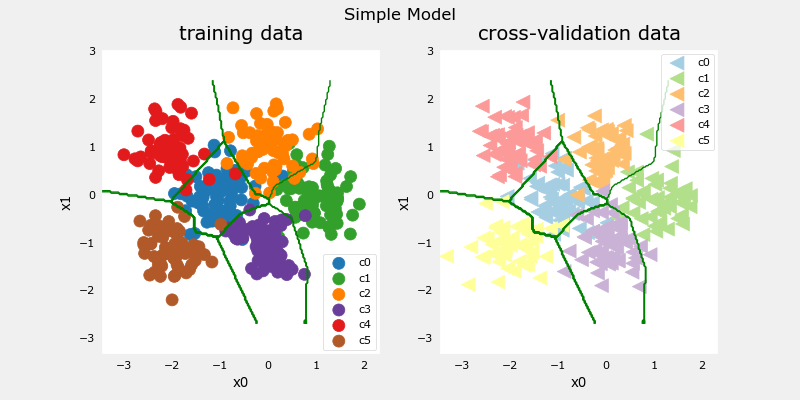

In [47]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

In [48]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
categorization error, training, simple model, 0.068, complex model: 0.003
categorization error, cv,       simple model, 0.078, complex model: 0.122


## 6 Regularization

### <span style="color:red">Exercise 5</span>

In [50]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        tf.keras.layers.Dense(120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6, activation="linear")
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)

In [51]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7409  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7572 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3609 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1280 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0364 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9797 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9188 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.8729
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.8393
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.8106
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7846 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7628 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7470 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7330 
Epoch 15/1000
13/13 ━━━━━━━━━━━━━━━━━━━

In [52]:
model_r.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 120)            │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 40)             │         4,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,340 (127.66 KB)

 Trainable params: 5,446 (42.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,894 (85.11 KB)

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step


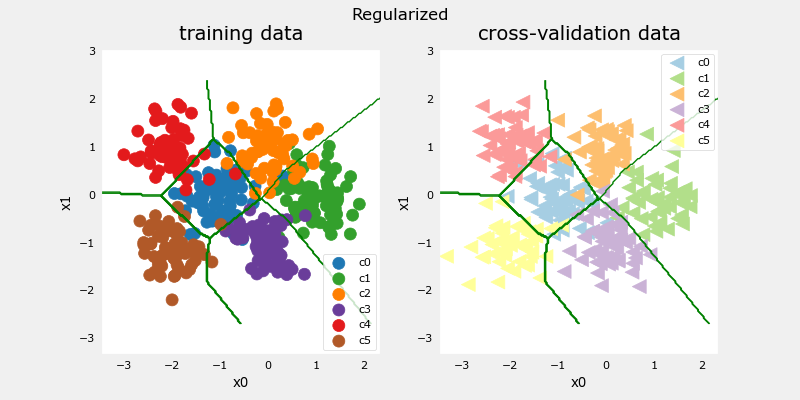

In [53]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [54]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
categorization error, training, regularized: 0.075, simple model, 0.068, complex model: 0.003
categorization error, cv,       regularized: 0.072, simple model, 0.078, complex model: 0.122


## 7 Iterate to find optimal regularization value

In [55]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3256   
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4176 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3366 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2505 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2218 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2257 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2134 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2075 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1976 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1970 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1958 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1950 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1903 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1912 
Epoch 15/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 

Finished lambda = 0.0
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3549
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5284 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4546 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3773 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3096 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3037 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2918 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2788 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2692 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2639 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2591 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2569 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2531 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2532 
Epoch 15/1000
13/13 ━━

Finished lambda = 0.001
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8943
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8454 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6758 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5746 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5150 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4759 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4623 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4524 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4507 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4409 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4310 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4207 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4083 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3996 
Epoch 15/1000
13/13 

Finished lambda = 0.01
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6720
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2975 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0154 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8866 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8113 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7467 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7055 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6765 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6489 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6228 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6053 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5933 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5890 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5779 
Epoch 15/1000
13/13 ━

Finished lambda = 0.05
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7689  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7405 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3828 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1242 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9949 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9377 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9014 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8685 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8348 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7996 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7675 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7420 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7256 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7138 
Epoch 15/1000
13/13

Finished lambda = 0.1
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 10.1320
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1755 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8492 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5321 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3913 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3022 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2167 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1580  
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0993 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0520 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0197 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9932 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9706 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9491 
Epoch 15/1000
13/13 

Finished lambda = 0.2
Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 14.1708
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4784 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1521 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7745 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6016 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4822 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3811 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3123 
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2639 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2209 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1825 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1471 
Epoch 13/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1190 
Epoch 14/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0983 
Epoch 15/1000
13/13 ━

Finished lambda = 0.3


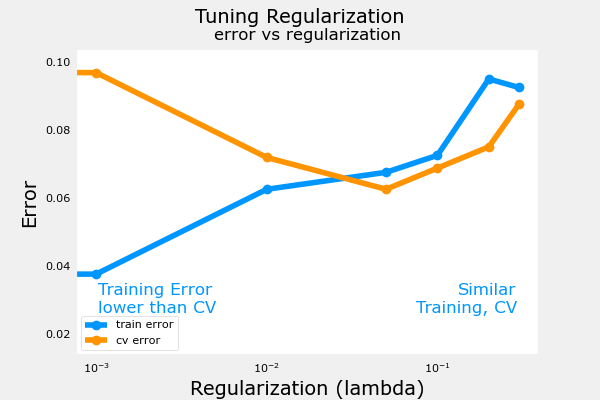

In [56]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

### 7.1 Test

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


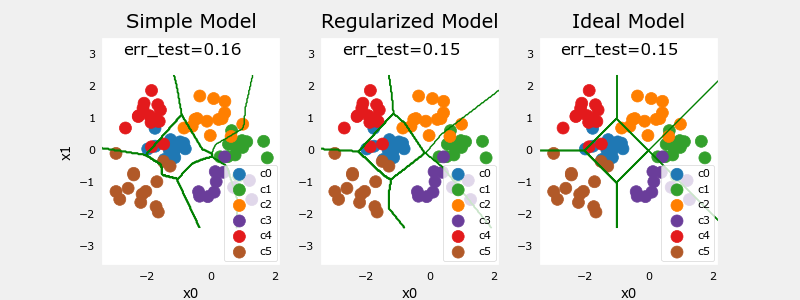

In [57]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)